In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import ssl
import numpy as np
from sklearn import linear_model

ssl._create_default_https_context = ssl._create_unverified_context


In [2]:
response = requests.get('https://artlive.artisticmilliners.com:8081/ords/art/mlapi/d_sales_year', verify = False).text
response_info = json.loads(response)
data=response_info['items']

C:\Users\Naeem\anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'artlive.artisticmilliners.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\Naeem\anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'artlive.artisticmilliners.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [3]:
type(data)

list

In [4]:
data[1]

{'trxyear': 2018,
 'trxmonth': 'AUG-17',
 'msno': 1708,
 'total_amount_bill': 14.56,
 'total_mtrs_mill': 4.87}

In [5]:
len(data)

59

In [93]:
df=pd.DataFrame(data)
df.head()

,trxyear,trxmonth,msno,total_amount_bill,total_mtrs_mill
0,2018,JUL-17,1707,14.08,4.56
1,2018,AUG-17,1708,14.56,4.87
2,2018,SEP-17,1709,13.73,4.51
3,2018,OCT-17,1710,15.72,4.90
4,2018,NOV-17,1711,15.29,4.84


In [7]:
Data=df.drop(columns=['trxyear','trxmonth','msno'])
#total_amount_bill 	total_mtrs_mill
Data.tail()

,total_amount_bill,total_mtrs_mill
54,26.72,7.73
55,25.27,7.12
56,27.27,7.64
57,25.19,7.16
58,3.37,0.92


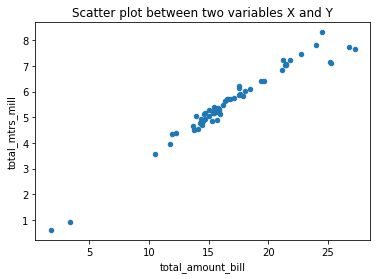

In [8]:
Data.plot.scatter(x='total_amount_bill', y='total_mtrs_mill', title= "Scatter plot between two variables X and Y");

plt.show(block=False);

In [39]:
type(Data)

pandas.core.frame.DataFrame

In [40]:
Data.shape

(59, 2)

In [9]:
max(Data.total_amount_bill)

27.27

In [10]:
max(Data.total_mtrs_mill)

8.3

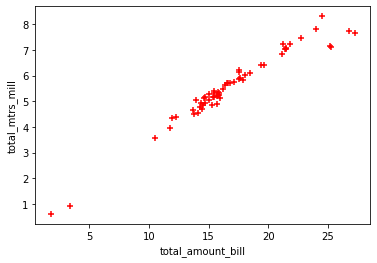

In [11]:
%matplotlib inline
plt.xlabel('total_amount_bill')
plt.ylabel('total_mtrs_mill')
plt.scatter(Data.total_amount_bill,Data.total_mtrs_mill,color='red',marker='+')

In [12]:
rev = Data.drop('total_mtrs_mill',axis='columns')
rev.head()

,total_amount_bill
0,14.08
1,14.56
2,13.73
3,15.72
4,15.29


In [13]:
qty = Data.drop('total_amount_bill',axis='columns')
qty.head()

,total_mtrs_mill
0,4.56
1,4.87
2,4.51
3,4.90
4,4.84


In [14]:
type(qty)

pandas.core.frame.DataFrame

In [15]:
type(rev)

pandas.core.frame.DataFrame

In [16]:
# for i in range(100):
#     X_train, X_test, y_train, y_test = train_test_split(qty,rev,test_size=0.2,random_state=i) 
#     Tes = LinearRegression()
#     Tes.fit(X_train, y_train)
#     print("i: ",i," acc : ",Tes.score(X_test, y_test))

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(qty,rev,test_size=0.2,random_state=1) 

In [18]:
X_train.shape

(47, 1)

In [19]:
y_test.shape

(12, 1)

In [20]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [34]:
LR

LinearRegression()

In [50]:
type(y_test)

pandas.core.frame.DataFrame

In [22]:
qty.shape

(59, 1)

In [23]:
testy=LR.predict(qty)
testy

array([[13.56202077],
       [14.59386521],
       [13.39559424],
       [14.69372113],
       [14.4940093 ],
       [15.39271253],
       [17.78925447],
       [13.99472973],
       [15.8919921 ],
       [16.55769819],
       [15.82542149],
       [14.79357704],
       [14.86014765],
       [15.1930007 ],
       [14.22772686],
       [16.32470106],
       [15.49256844],
       [15.226286  ],
       [15.62570966],
       [13.86158851],
       [17.35654551],
       [17.38983081],
       [15.9252774 ],
       [12.82974406],
       [16.12498923],
       [15.55913905],
       [15.65899496],
       [17.42311612],
       [16.19155984],
       [16.15827454],
       [18.48824587],
       [17.48968672],
       [11.59818779],
       [ 0.44761071],
       [10.2667756 ],
       [12.99617059],
       [15.59242436],
       [17.12354837],
       [19.75308745],
       [19.75308745],
       [17.9889663 ],
       [17.95568099],
       [18.78781361],
       [18.62138709],
       [21.81677634],
       [21

In [24]:
LR.score(X_test, y_test)

0.9745883660520708

In [ ]:
#===========Mont to Quantity================